In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import pandas as pd

In [3]:
def rbf_kernel(X1, X2, l=1.0, sigma_f=1.0):
    sqdist = np.sum(X1**2, 1).reshape(-1, 1) + np.sum(X2**2, 1) - 2 * np.dot(X1, X2.T)
    return sigma_f**2 * np.exp(-0.5 / l**2 * sqdist)

In [13]:
X = np.linspace(0, 5, 10).reshape(-1, 1)

In [29]:
K = rbf_kernel(X, X)
K.shape

(10, 10)

Text(0.5, 1.0, 'Covariant matrix, K')

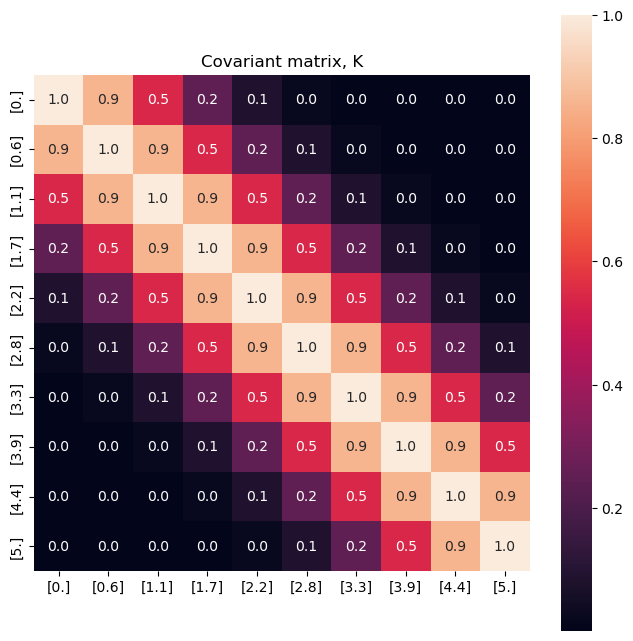

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
X_str = [np.array2string(x, precision=1, floatmode='maxprec_equal', suppress_small=True) for x in X]
K_df = pd.DataFrame(K, index=X_str, columns=X_str)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
sns.heatmap(K_df, annot=True, ax=ax, fmt="1.1f")
ax.set_aspect("equal")
ax.set_title("Covariant matrix, K")

In [31]:
n_samples = 5
y_samples = multivariate_normal.rvs(mean=np.zeros(len(X)), cov=K, size=n_samples).T

y_samples

array([[ 1.7833647 , -0.83464386,  0.58144988, -1.41016254, -1.22669053],
       [ 0.95659932, -1.34177365, -0.42228699, -1.59646907, -0.7517234 ],
       [ 0.16193688, -1.39322629, -1.11471501, -0.43369945,  0.12685784],
       [-0.29446294, -1.19097537, -1.20095667,  1.11641015,  0.75607884],
       [-0.36107685, -1.14007544, -0.93601561,  1.47288205,  1.09602595],
       [-0.1915915 , -0.93577465, -0.77229988,  0.61964495,  0.909879  ],
       [ 0.05118004, -0.36874849, -0.85164429, -0.03748967,  0.02158437],
       [ 0.58355736,  0.26141728, -0.737463  , -0.18512009, -0.99440771],
       [ 1.23032141,  0.54461543, -0.20138887, -0.55167587, -1.50804621],
       [ 1.20427211,  0.35033202,  0.05028186, -0.87541633, -1.32170465]])

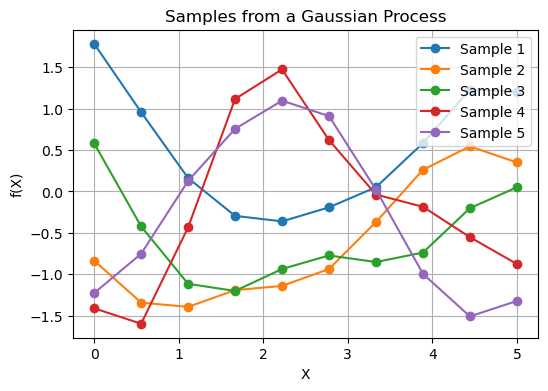

In [41]:
plt.figure(figsize=(6, 4))
for i in range(n_samples):
    plt.plot(X, y_samples[:, i], label=f'Sample {i+1}', marker="o")

plt.title('Samples from a Gaussian Process')
plt.xlabel('X')
plt.ylabel('f(X)')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
selected_points = [1, 3, 5, 7, 9]
X_selected = X[selected_points]
y_selected = y_samples[selected_points, :]

print("Selected X points:")
print(X_selected.flatten())

print("\nCorresponding f(X) values for each sample:")
print(y_selected)

Selected X points:
[0.55555556 1.66666667 2.77777778 3.88888889 5.        ]

Corresponding f(X) values for each sample:
[[ 0.95659932 -1.34177365 -0.42228699 -1.59646907 -0.7517234 ]
 [-0.29446294 -1.19097537 -1.20095667  1.11641015  0.75607884]
 [-0.1915915  -0.93577465 -0.77229988  0.61964495  0.909879  ]
 [ 0.58355736  0.26141728 -0.737463   -0.18512009 -0.99440771]
 [ 1.20427211  0.35033202  0.05028186 -0.87541633 -1.32170465]]


In [35]:
mean = np.zeros(len(selected_points))
cov = K[np.ix_(selected_points, selected_points)]

print("\nMean of the joint distribution:")
print(mean)

print("\nCovariance matrix of the joint distribution:")
print(cov)


Mean of the joint distribution:
[0. 0. 0. 0. 0.]

Covariance matrix of the joint distribution:
[[1.00000000e+00 5.39407507e-01 8.46579886e-02 3.86592014e-03
  5.13655312e-05]
 [5.39407507e-01 1.00000000e+00 5.39407507e-01 8.46579886e-02
  3.86592014e-03]
 [8.46579886e-02 5.39407507e-01 1.00000000e+00 5.39407507e-01
  8.46579886e-02]
 [3.86592014e-03 8.46579886e-02 5.39407507e-01 1.00000000e+00
  5.39407507e-01]
 [5.13655312e-05 3.86592014e-03 8.46579886e-02 5.39407507e-01
  1.00000000e+00]]


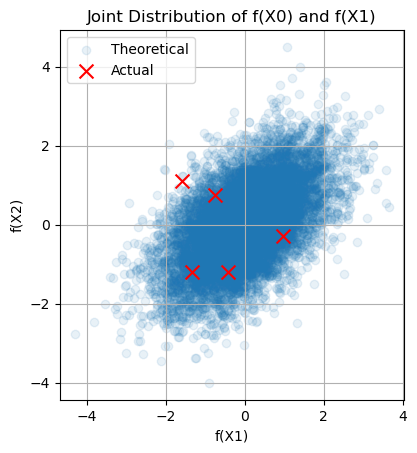

In [42]:
theoretical_samples = multivariate_normal.rvs(mean=mean, cov=cov, size=10000)
actual_samples = y_selected.T

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(theoretical_samples[:, 0], theoretical_samples[:, 1], alpha=0.1, label='Theoretical')
ax.scatter(actual_samples[:, 0], actual_samples[:, 1], color='red', marker='x', s=100, label='Actual')
ax.set_title('Joint Distribution of f(X0) and f(X1)')
ax.set_xlabel('f(X1)')
ax.set_ylabel('f(X2)')
ax.legend()
ax.grid(True)
ax.set_aspect("equal")
fig.show()